In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
nf = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


6 columns have missing values (Director, cast, country, date_added, rating, duration)

In [5]:
nf.fillna('No Data', inplace=True)

In [7]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
nf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


I have filled NaN values.

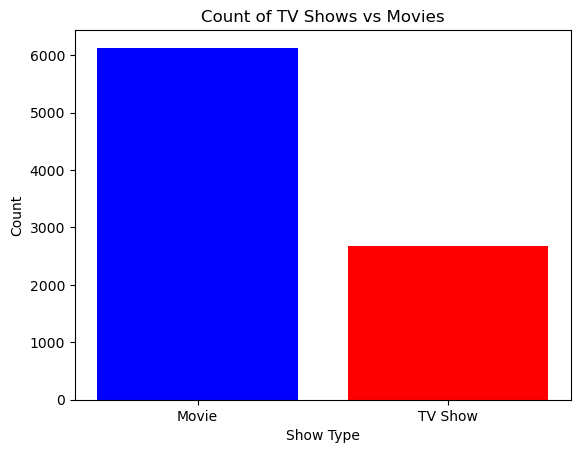

In [11]:
show_type_count = nf['type'].value_counts()
plt.bar(show_type_count.index, show_type_count.values, color=['blue', 'red'])
plt.title('Count of TV Shows vs Movies')
plt.xlabel('Show Type')
plt.ylabel('Count')
plt.show()

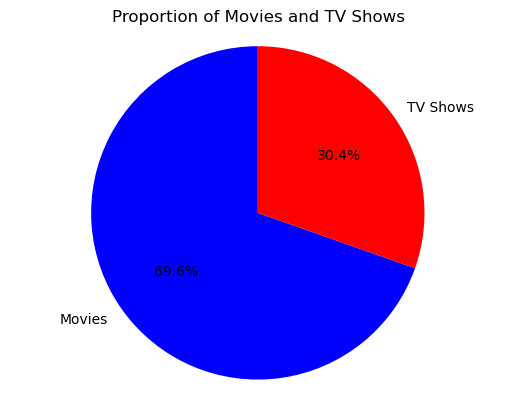

In [13]:
num_movies = len(nf[nf['type'] == 'Movie'])
num_tv_shows = len(nf[nf['type'] == 'TV Show'])
labels = ['Movies', 'TV Shows']
sizes = [num_movies, num_tv_shows]
colors = ['blue', 'red']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proportion of Movies and TV Shows')

plt.show()

Movies make up for about 70% of content on Netflix

In [14]:
tv=nf[nf['type']=='TV Show']
movie=nf[nf['type']=='Movie']

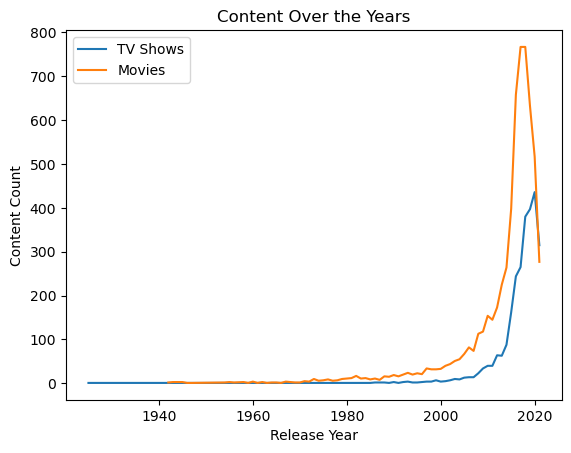

In [15]:
tv_count = tv.groupby('release_year')['type'].count()
movie_count = movie.groupby('release_year')['type'].count()

plt.plot(tv_count.index, tv_count.values, label='TV Shows')
plt.plot(movie_count.index, movie_count.values, label='Movies')
plt.xlabel('Release Year')
plt.ylabel('Content Count')
plt.title('Content Over the Years')
plt.legend()
plt.show()

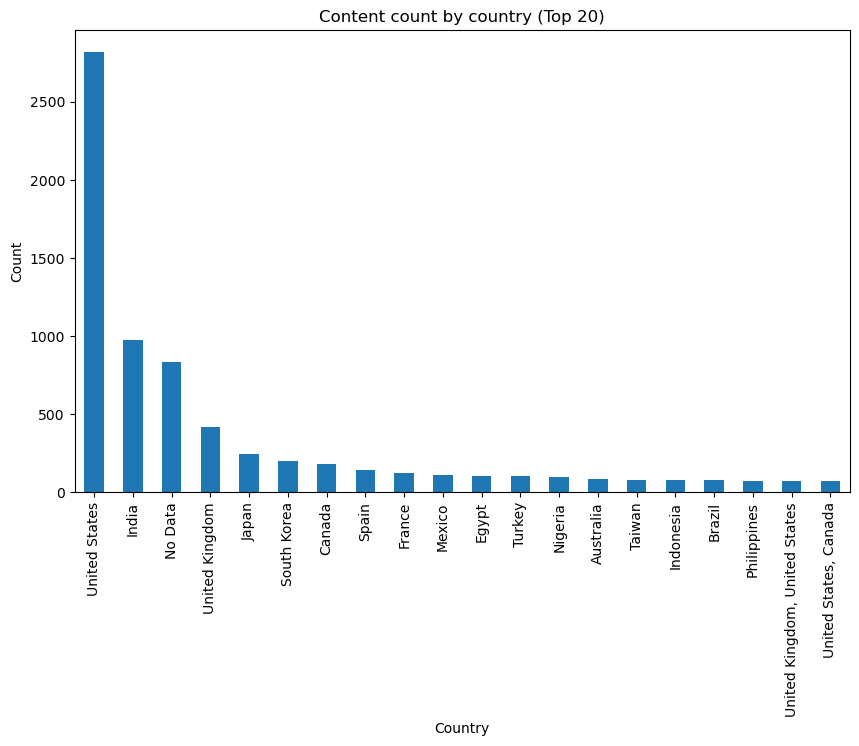

In [16]:
country_counts = nf['country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts[:20].plot(kind='bar')
plt.title('Content count by country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [26]:
movie_counts = movie['listed_in'].value_counts().reset_index()
movie_counts.columns = ['Listed_In', 'Movie Count']
movie_top_listed_in = movie_counts.head()

tv_counts = tv['listed_in'].value_counts().reset_index()
tv_counts.columns = ['Listed_In', 'TV Count']
tv_top_listed_in = tv_counts.head()

top_listed_in = pd.merge(movie_top_listed_in, tv_top_listed_in, on='Listed_In', how='outer')

top_listed_in.fillna(0, inplace=True)

print(top_listed_in)

                                           Listed_In  Movie Count  TV Count
0                       Dramas, International Movies        362.0       0.0
1                                      Documentaries        359.0       0.0
2                                    Stand-Up Comedy        334.0       0.0
3             Comedies, Dramas, International Movies        274.0       0.0
4   Dramas, Independent Movies, International Movies        252.0       0.0
5                                           Kids' TV          0.0     220.0
6                  International TV Shows, TV Dramas          0.0     121.0
7  Crime TV Shows, International TV Shows, TV Dramas          0.0     110.0
8                              Kids' TV, TV Comedies          0.0      99.0
9                                         Reality TV          0.0      95.0


For the past 19 years, the 'International Movies' genre has made the most content. I will use this see content from which countries users will likely see.

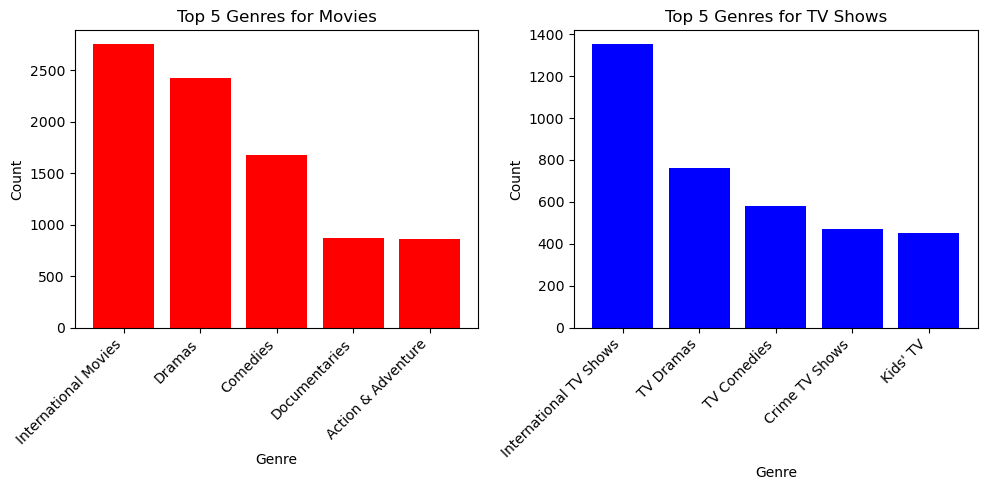

In [32]:
movie_genres = movie['listed_in'].str.split(', ').explode().reset_index(drop=True)
tv_genres = tv['listed_in'].str.split(', ').explode().reset_index(drop=True)

movie_genres_top5 = movie_genres.value_counts().nlargest(5)
tv_genres_top5 = tv_genres.value_counts().nlargest(5)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(movie_genres_top5.index, movie_genres_top5.values, color='red')
plt.title('Top 5 Genres for Movies')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.bar(tv_genres_top5.index, tv_genres_top5.values, color='blue')
plt.title('Top 5 Genres for TV Shows')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

I have found out which genres have the most content for Movies and Tv Show. I will find out which countries are the leading content creators foe International Movies and International TV shows.

In [41]:
international_movies = nf[(nf['type'] == 'Movie')]
international_movie_counts = international_movies.groupby('country').count()['show_id'].sort_values(ascending=False)
top_10_international_movie_counts = international_movie_counts.head(10)
top_10_international_movie_counts.to_frame().rename(columns={'show_id': 'International Movie Count'})

,International Movie Count
country,
United States,2058
India,893
No Data,440
United Kingdom,206
Canada,122
Spain,97
Egypt,92
Nigeria,86
Indonesia,77


In [42]:
international_tv = nf[(nf['type'] == 'TV Show')]
international_tv_counts = international_tv.groupby('country').count()['show_id'].sort_values(ascending=False)
top_10_international_tv_counts = international_tv_counts.head(10)
top_10_international_tv_counts.to_frame().rename(columns={'show_id': 'International TV Show Count'})

,International TV Show Count
country,
United States,760
No Data,391
United Kingdom,213
Japan,169
South Korea,158
India,79
Taiwan,68
Canada,59
France,49


In [43]:
set(top_10_international_movie_counts.index).intersection(set(top_10_international_tv_counts.index))

{'Canada',
 'India',
 'Japan',
 'No Data',
 'Spain',
 'United Kingdom',
 'United States'}